In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_columns = 100

In [3]:
path = '../Data/2018_rc_data.xlsx'
xl = pd.ExcelFile(path)
sheet_names = xl.sheet_names
sheet_names

['READ ME_Instructions',
 'ACT',
 'achievement',
 'discipline',
 'chronic_absenteeism',
 'CTE',
 'dropout',
 'ELPA',
 'enrollment',
 'finance',
 'grad_rate',
 'growth',
 'growth_subjects',
 'indicator_level_grades',
 'long_term_ell',
 'overall_grades',
 'postsec_enrollment',
 'ready_grad',
 'staffing',
 'success_rate',
 'teacher_retention',
 'district_info',
 'school_info']

In [4]:
for sheetname in sheet_names:
    if sheetname != 'READ ME_Instructions':
        vars()['df' + sheetname] = pd.read_excel(path, sheet_name= sheetname)

In [5]:
dfteacher_retention['percent_retained'] = dfteacher_retention['percent_retained'].replace('\*+', np.nan, regex=True)

In [6]:
dfteacher_retention['percent_retained'] = dfteacher_retention['percent_retained'].astype(float)

In [8]:
dfteacher_retention= dfteacher_retention[['district_name','school_name','percent_retained']]

In [13]:
school_overall_grades =  dfoverall_grades [['school_name', 'score_achievement', 'score_growth', 'score_absenteeism', 'score_grad']]

In [14]:
school_overall_grades.head()

,school_name,score_achievement,score_growth,score_absenteeism,score_grad
0,Anderson County High School,1.6,3.1,1.4,3.2
1,Andersonville Elementary,2.2,3.6,2.4,NaN
2,Briceville Elementary,3.0,3.8,0.0,NaN
3,Claxton Elementary,3.2,3.6,0.0,NaN
4,Clinton Middle School,2.0,0.1,1.1,NaN


In [ ]:
#avg_grades_district= school_overall_grades.groupby('district_name').mean().reset_index()

In [ ]:
#avg_grades_district.info()

In [15]:
rc_1 = dfteacher_retention.merge(school_overall_grades, 
                        on = 'school_name')

In [16]:
rc_1.head()


,district_name,school_name,percent_retained,score_achievement,score_growth,score_absenteeism,score_grad
0,Anderson County Schools,Anderson County High School,95.1,1.6,3.1,1.4,3.2
1,Anderson County Schools,Andersonville Elementary,92.0,2.2,3.6,2.4,NaN
2,Anderson County Schools,Briceville Elementary,100.0,3.0,3.8,0.0,NaN
3,Anderson County Schools,Claxton Elementary,81.8,3.2,3.6,0.0,NaN
4,Anderson County Schools,Clinton Middle School,77.1,2.0,0.1,1.1,NaN


<AxesSubplot:xlabel='percent_retained', ylabel='score_grad'>

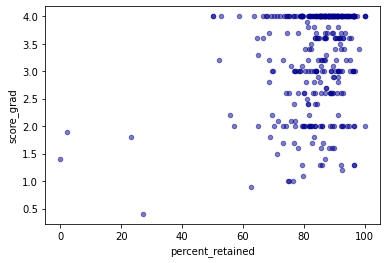

In [25]:
rc_1.plot.scatter(x = 'percent_retained', y = 'score_grad', c='darkblue',alpha=0.5)

In [18]:
rc_1['percent_retained'].corr(rc_1['score_achievement'])

0.14154125911351584

In [21]:
rc_1.corr().style.background_gradient(cmap="Blues")

,percent_retained,score_achievement,score_growth,score_absenteeism,score_grad
percent_retained,1.000000,0.141541,0.077067,0.062987,0.262640
score_achievement,0.141541,1.000000,0.386942,0.295146,0.217044
score_growth,0.077067,0.386942,1.000000,0.131364,0.090798
score_absenteeism,0.062987,0.295146,0.131364,1.000000,0.229968
score_grad,0.262640,0.217044,0.090798,0.229968,1.000000
